In [1]:
#Set up google colab working environment
%cd ~/../content
%rm -rf Colombian-peso-counterfeit-detection
!git clone https://github.com/zrosen3/Colombian-peso-counterfeit-detection.git 
%cd /content/Colombian-peso-counterfeit-detection/Code    

/content
Cloning into 'Colombian-peso-counterfeit-detection'...
remote: Enumerating objects: 42327, done.
remote: Counting objects: 100% (153/153), done.
remote: Compressing objects: 100% (120/120), done.
remote: Total 42327 (delta 102), reused 50 (delta 33), pack-reused 42174
Receiving objects: 100% (42327/42327), 884.95 MiB | 18.25 MiB/s, done.
Resolving deltas: 100% (1261/1261), done.
Updating files: 100% (103997/103997), done.
/content/Colombian-peso-counterfeit-detection/Code


In [4]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import common_functions as cf
import tensorflow as tf



# CNN

In [5]:
def MakeModel(class_names: list) -> tf.keras.Sequential:
    """
    Simple straight forward CNN model. this is just for simplicity and testing
    atm. I will make it more modular later once I know what we are doing

    Args:
        class_names: list of the classification names
        conv_layers: list of how many filters each convolutional layer should use
        layers: list with the sizes of each hidden layer
    
    Returns:
        `tf.keras.Sequential` - a constructed tf model
    """
    tf.keras.backend.clear_session()
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Rescaling(1./255))
    model.add(tf.keras.layers.Conv2D(32, 3, activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D())
    model.add(tf.keras.layers.Conv2D(64, 3, activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D())
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(len(class_names))) # output

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )
    return model
    

## Load Data

Found 24958 files belonging to 13 classes.
Found 8320 files belonging to 13 classes.
Found 8320 files belonging to 13 classes.


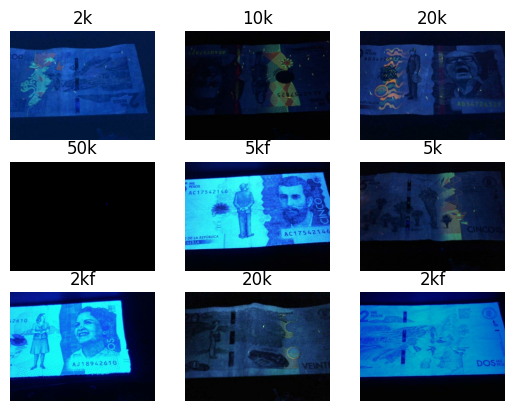

In [7]:
train_ds, test_ds, validation_ds, class_names = cf.LoadData(path = "../Data/Augmented/", batch_size=12)
cf.PeakData(train_ds, class_names)

# Fit

In [8]:
model = MakeModel(class_names)
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=5
)

Epoch 1/5
2080/2080 [==============================] - 245s 112ms/step - loss: 0.7209 - accuracy: 0.7706 - val_loss: 0.2045 - val_accuracy: 0.9445
Epoch 2/5
2080/2080 [==============================] - 230s 111ms/step - loss: 0.1178 - accuracy: 0.9670 - val_loss: 0.1424 - val_accuracy: 0.9525
Epoch 3/5
2080/2080 [==============================] - 234s 112ms/step - loss: 0.0638 - accuracy: 0.9813 - val_loss: 0.0995 - val_accuracy: 0.9683
Epoch 4/5
2080/2080 [==============================] - 231s 111ms/step - loss: 0.0474 - accuracy: 0.9863 - val_loss: 0.0715 - val_accuracy: 0.9755
Epoch 5/5
2080/2080 [==============================] - 233s 112ms/step - loss: 0.0428 - accuracy: 0.9868 - val_loss: 0.1343 - val_accuracy: 0.9582


# Evaluate

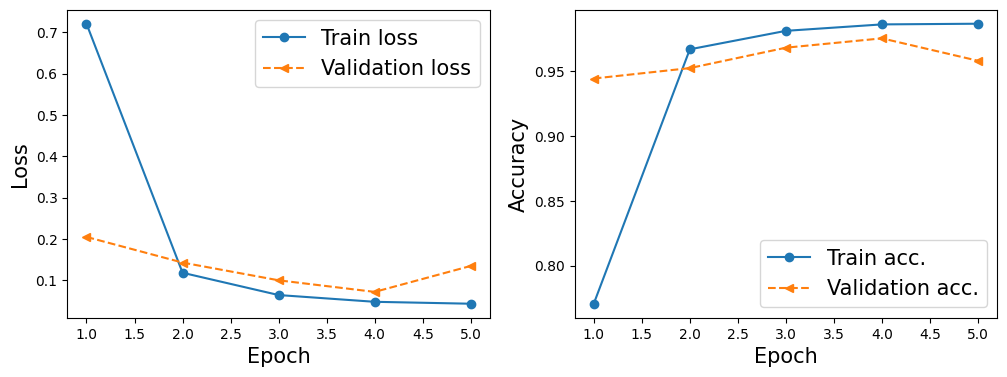

694/694 - 38s - loss: 0.1460 - accuracy: 0.9579 - 38s/epoch - 54ms/step
Test loss: 0.14596593379974365 | Test accuracy: 0.957932710647583


(0.9867777824401855, 0.9581730961799622, 0.957932710647583)

In [9]:
cf.EvaluateModel(model, test_ds, history)

Macro averaged precision score: 0.9579326923076923
Macro averaged recall score: 0.9616484488171625
Macro averaged F1 score: 0.9585303620627769


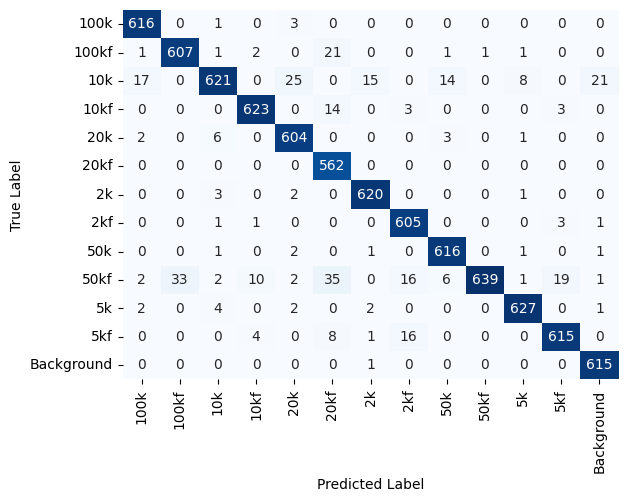

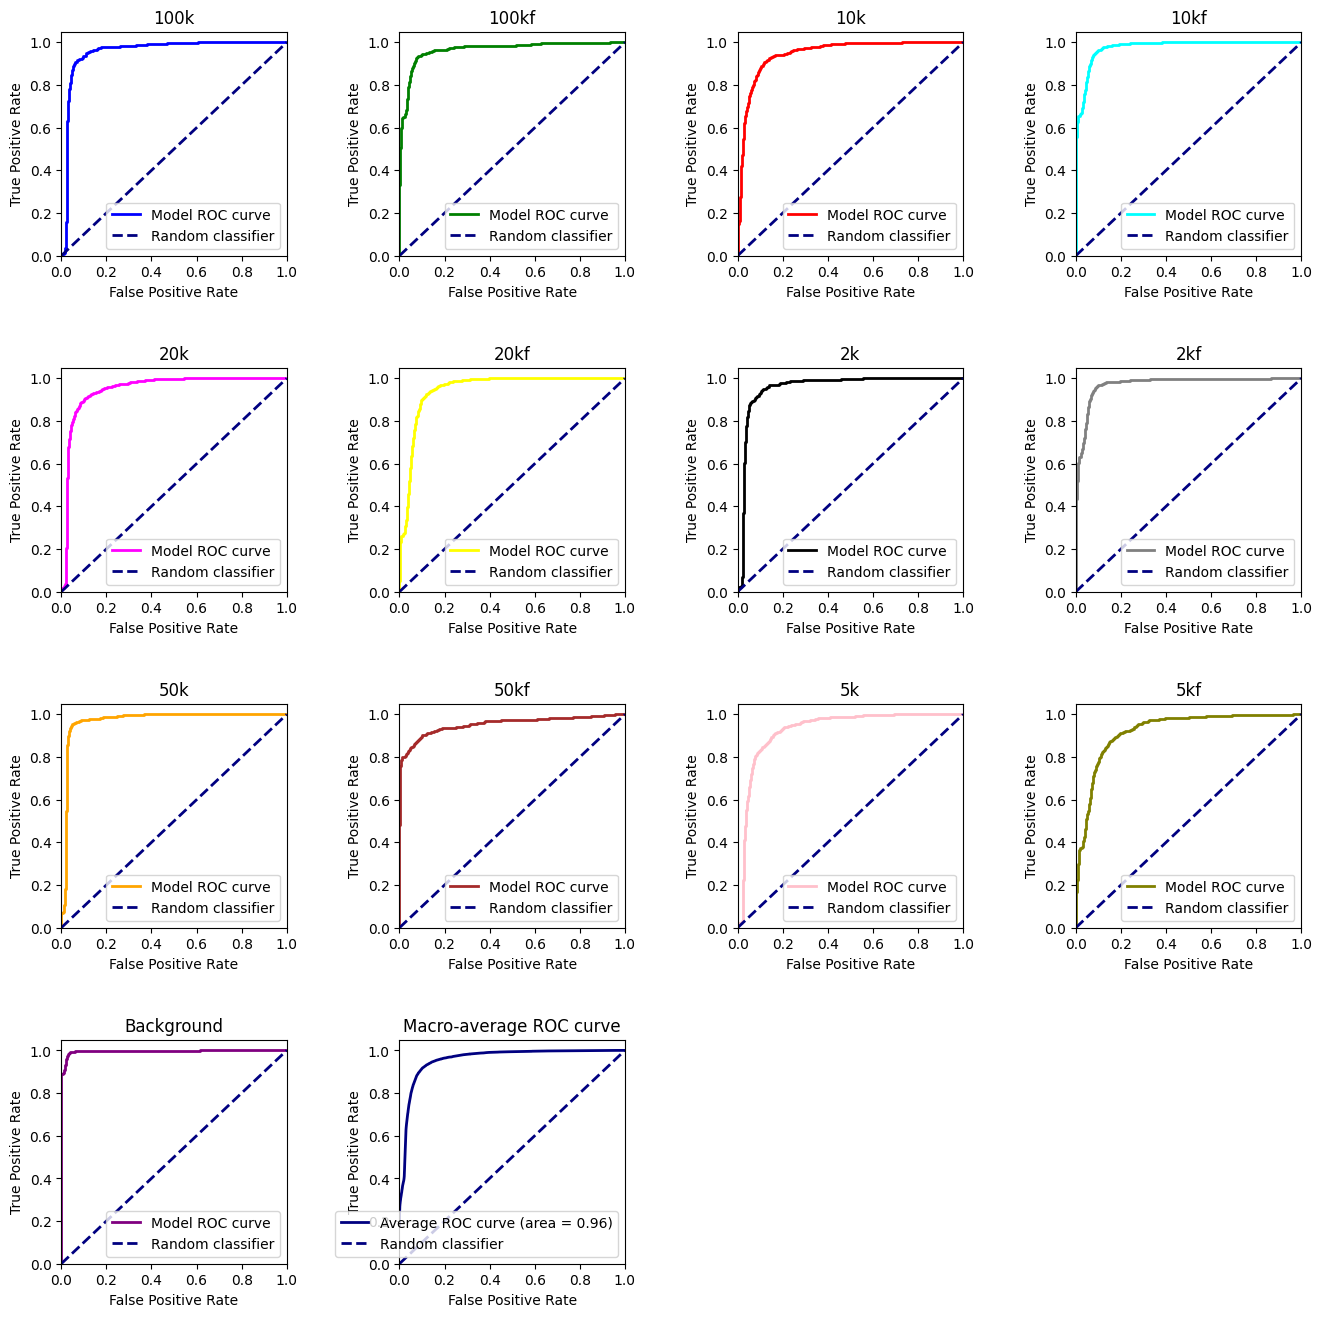

In [10]:
cf.precision_recall_metrics(model, test_ds, class_names)